# Before compiling python codes

1. Compile fortran codes in src directory
2. Compile setup.py, which connects fortran-compiled objects with python modules
3. This procedure is written in build.sh, therefore simply execute on terminal 'sh build.sh'

In src directory, there are two f90 files, mesh.f90 and fmesh_wrapper.f90. mesh.f90 is a pure fortran code, and fmesh_wrapper.f90 is a code that generates C object file (fmesh_wrapper.o) from mesh.f90 and mesh.o.<br>
In python modules only fmesh_wrapper.o is used.<br>
If you want to use C++ code rather than fortran, you do not need fmesh_wrapper and just need to write mesh.cpp (in C++). Then C++ object file mesh.o will be used in setup.py.

setup.py connects a-priori-compiled object files with cython module fmesh.pyx (set up dependencies). You need to set up parameters according to your architecture.

# In python modules

Import basic modules

In [1]:
import numpy as np
import scipy as np
import matplotlib.pyplot as plt
%matplotlib inline

Import fmesh module

In [2]:
from fmesh import *

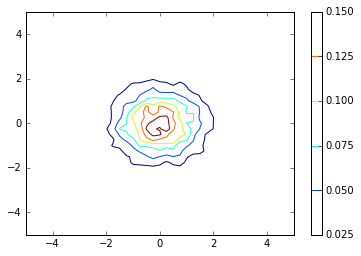

In [9]:
N=10000
np.random.seed(1231)
xp = np.random.normal(size=N)
yp = np.random.normal(size=N)
Lx, Ly = 5.0, 5.0
Ng = 20
qmesh = mesh(Ng,Lx,Ly)
pg = qmesh.ptc2pdf(xp,yp)
plt.figure(1)
plt.contour(qmesh.xg,qmesh.yg,pg)
plt.colorbar()